Total Images: 10000
Total Annotations: 279237
Unique Classes: 12


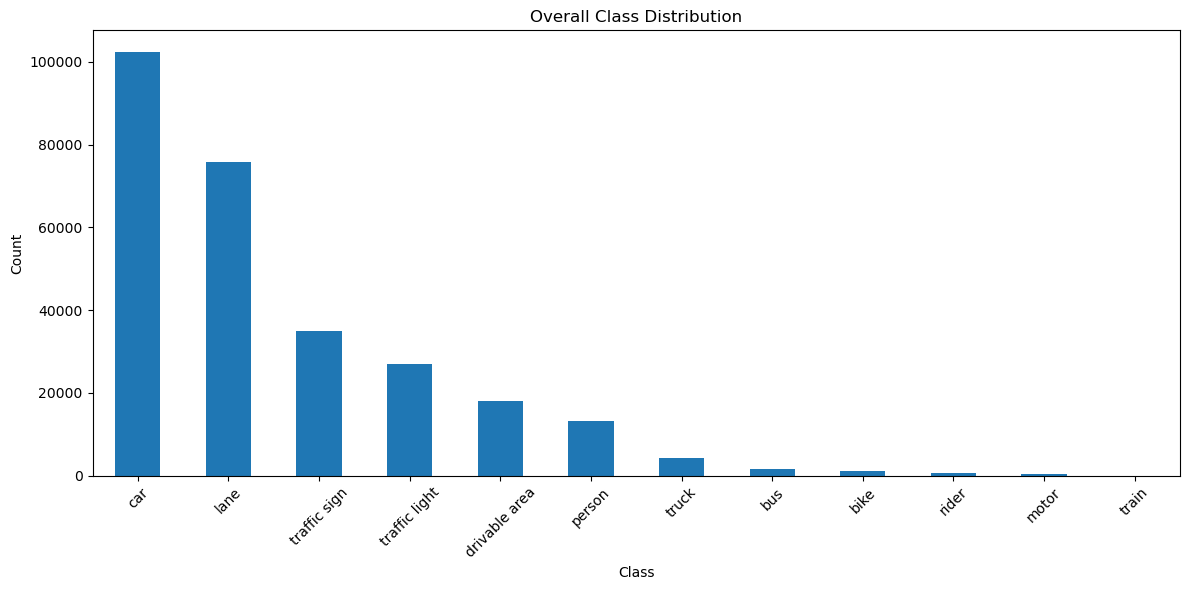

<Figure size 640x480 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

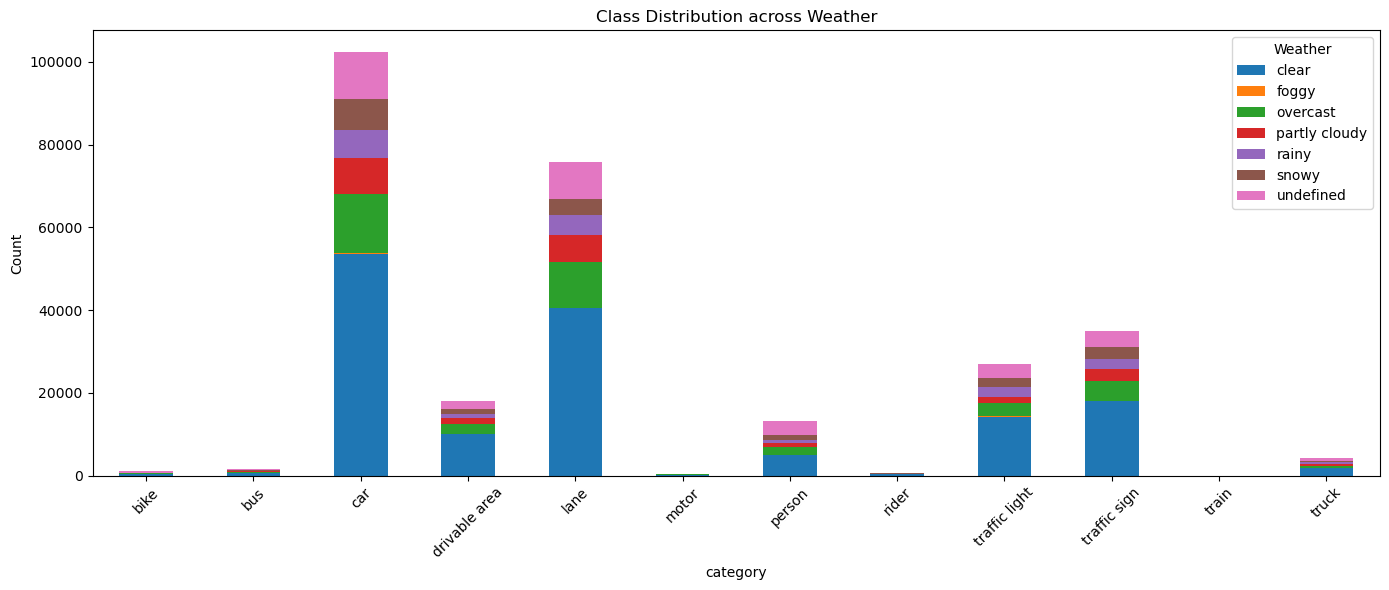

<Figure size 640x480 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

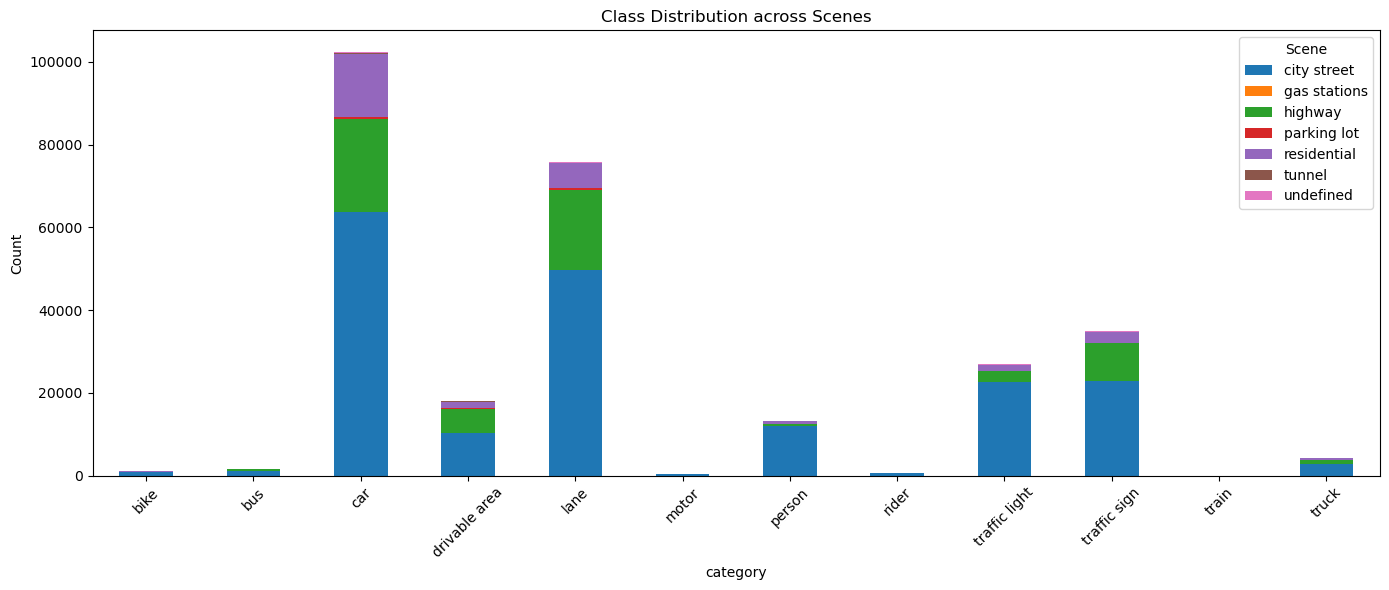

<Figure size 640x480 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

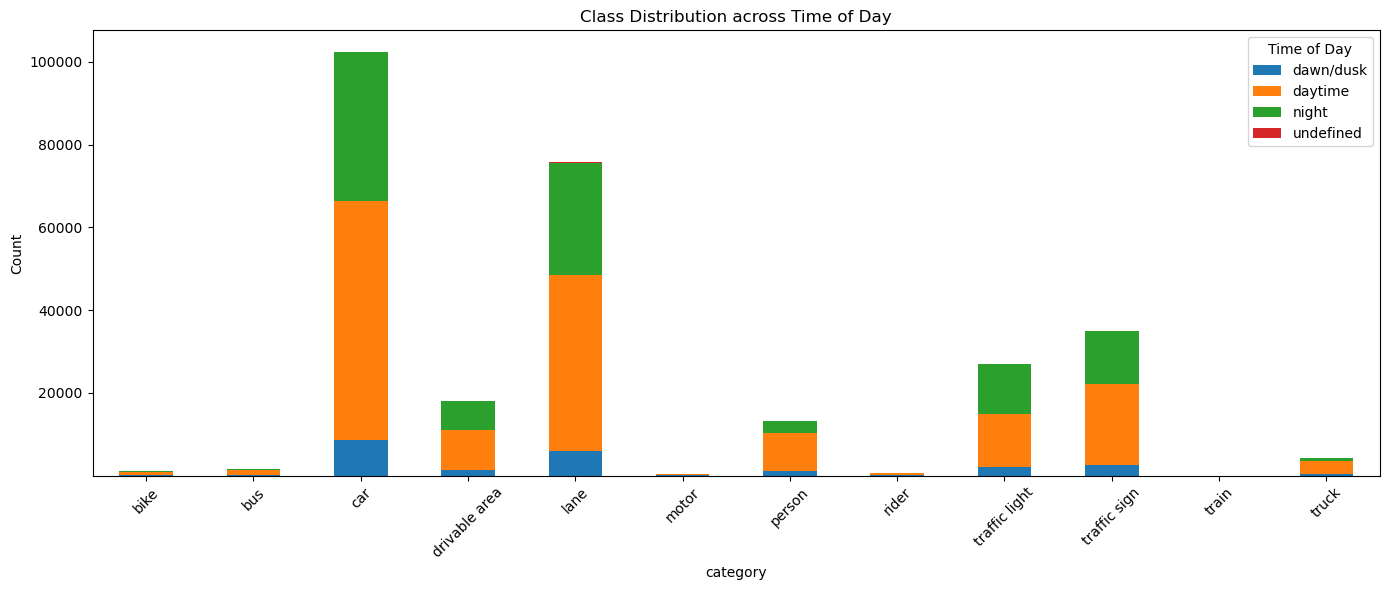

<Figure size 640x480 with 0 Axes>

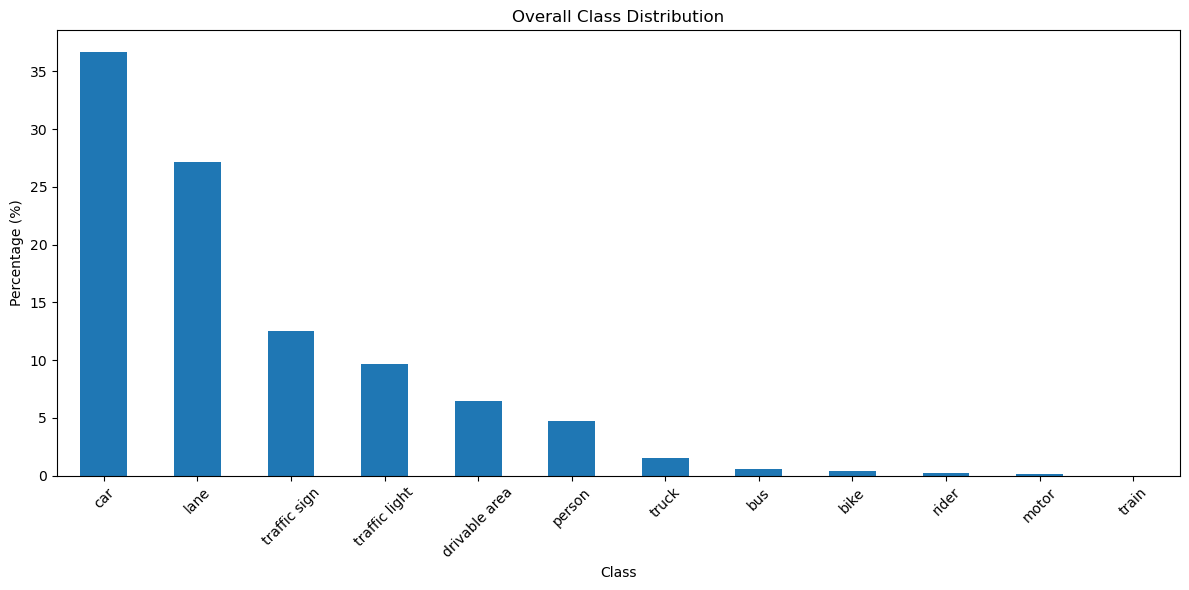

<Figure size 640x480 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

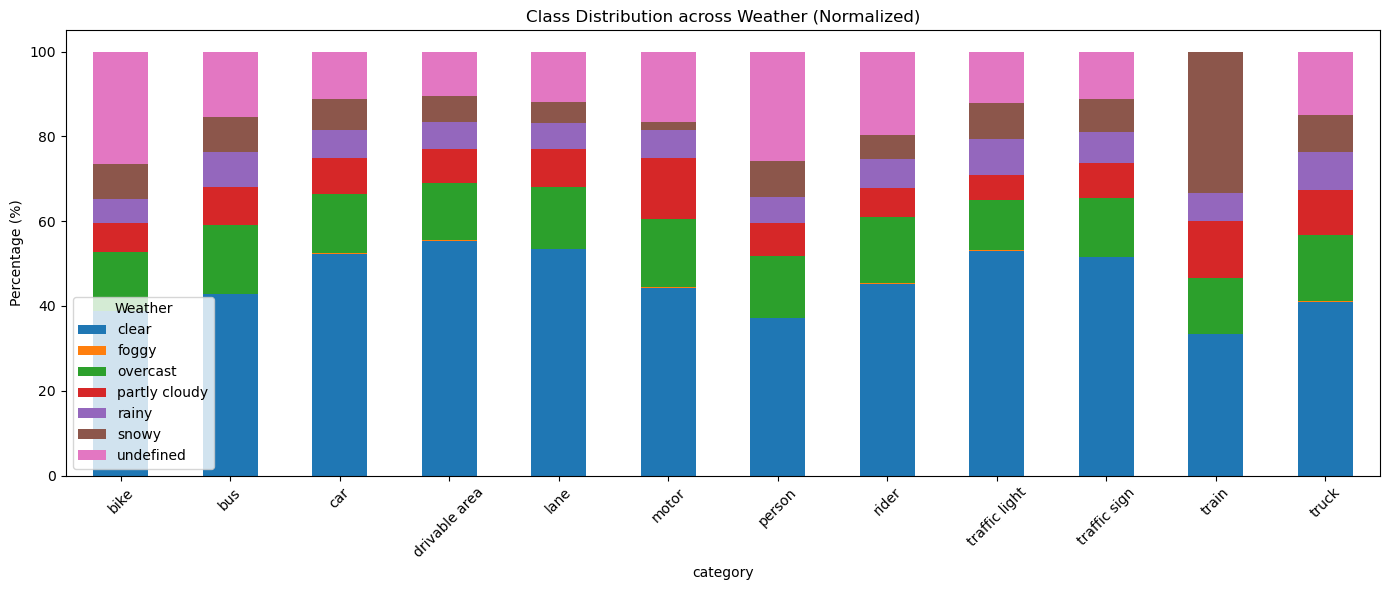

<Figure size 640x480 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

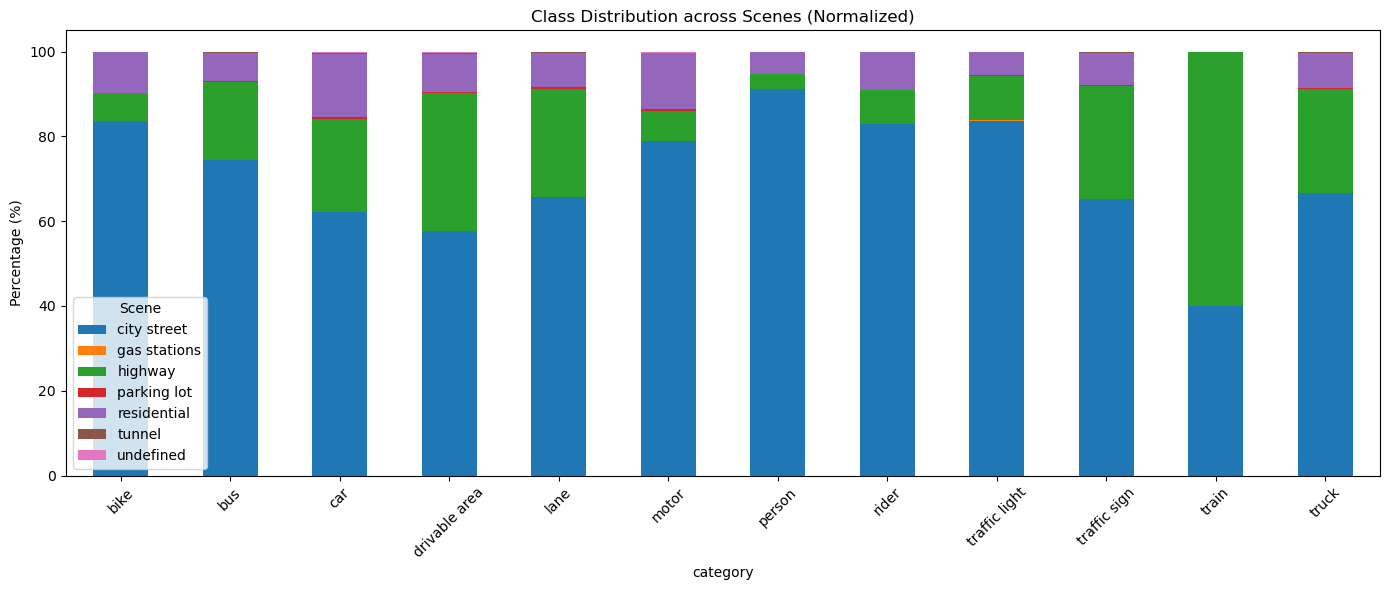

<Figure size 640x480 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

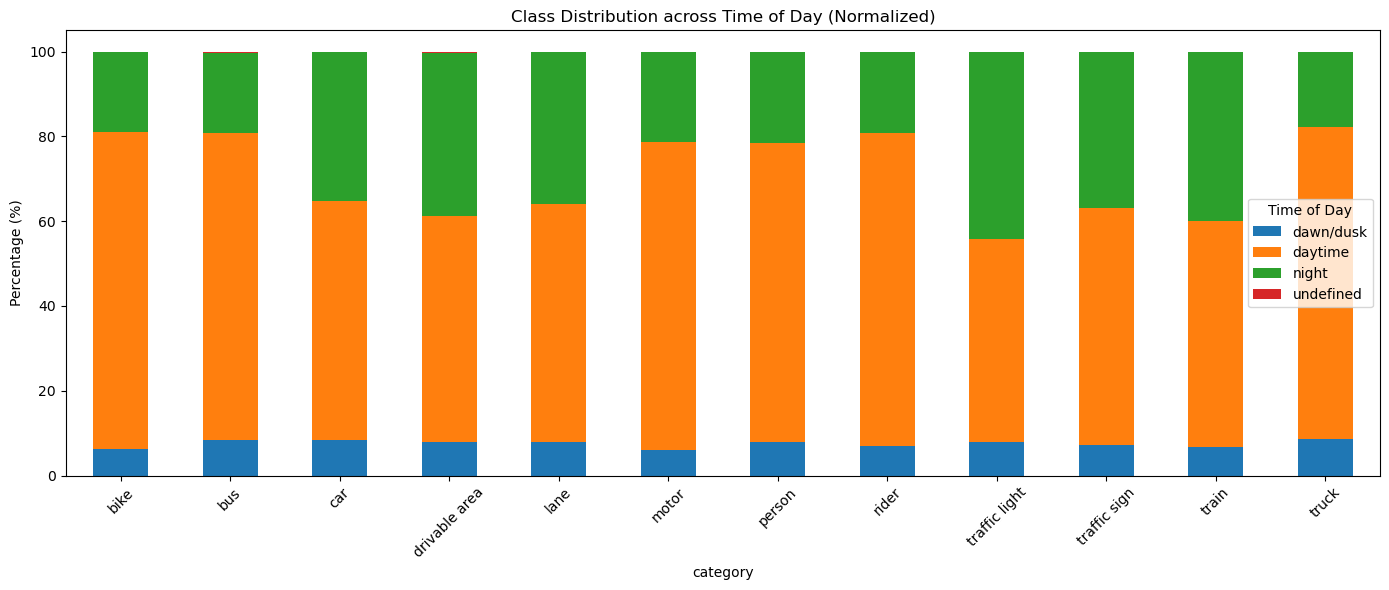

<Figure size 640x480 with 0 Axes>

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt


def load_bdd_annotations(annotation_path):
    """Load BDD JSON annotations into a pandas DataFrame."""
    with open(annotation_path, "r", encoding="utf-8") as file:
        annotations = json.load(file)

    records = []
    for image in annotations:
        img_name = image["name"]
        weather = image["attributes"]["weather"]
        scene = image["attributes"]["scene"]
        time_of_day = image["attributes"]["timeofday"]

        for label in image["labels"]:
            records.append({
                "image": img_name,
                "weather": weather,
                "scene": scene,
                "time_of_day": time_of_day,
                "category": label["category"],
            })

    return pd.DataFrame(records)


def plot_class_distribution(df, normalize=False):
    """
    Plot overall class distribution.

    Args:
        df (pd.DataFrame): DataFrame with annotations.
        normalize (bool): If True, plot percentages instead of counts.
    """
    plt.figure(figsize=(12, 6))
    value_counts = df["category"].value_counts(normalize=normalize)

    if normalize:
        value_counts *= 100
        ylabel = "Percentage (%)"
    else:
        ylabel = "Count"

    value_counts.plot(kind="bar")
    plt.title("Overall Class Distribution")
    plt.xlabel("Class")
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig('Overall Class Distribution.png')


def plot_class_vs_attribute(df, attribute, title, legend_title,
                            normalize=False):
    """
    Plot class distribution against a given attribute.

    Args:
        df (pd.DataFrame): DataFrame with annotations.
        attribute (str): Attribute to group by (weather, scene, time_of_day).
        title (str): Plot title.
        legend_title (str): Legend label.
        normalize (bool): If True, plot percentages instead of counts.
    """
    cross_tab = pd.crosstab(df["category"], df[attribute],
                            normalize="index" if normalize else False)

    if normalize:
        cross_tab *= 100
        ylabel = "Percentage (%)"
    else:
        ylabel = "Count"

    plt.figure(figsize=(14, 6))
    cross_tab.plot(kind="bar", stacked=True, figsize=(14, 6))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend(title=legend_title)
    plt.tight_layout()
    plt.show()
    plt.savefig(title+'.png')


def main():
    # Path to annotations
    annotation_file = (
        "/nfs/ECAC_Data/Somya_data/BDD_Data/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_val.json"
        
    )

    # Load data
    df = load_bdd_annotations(annotation_file)

    # Print basic stats
    print("Total Images:", df["image"].nunique())
    print("Total Annotations:", len(df))
    print("Unique Classes:", df["category"].nunique())

    # Plots (raw counts)
    plot_class_distribution(df, normalize=False)
    plot_class_vs_attribute(
        df, "weather", "Class Distribution across Weather",
        "Weather", normalize=False
    )
    plot_class_vs_attribute(
        df, "scene", "Class Distribution across Scenes",
        "Scene", normalize=False
    )
    plot_class_vs_attribute(
        df, "time_of_day", "Class Distribution across Time of Day",
        "Time of Day", normalize=False
    )

    # Plots (normalized percentages)
    plot_class_distribution(df, normalize=True)
    plot_class_vs_attribute(
        df, "weather", "Class Distribution across Weather (Normalized)",
        "Weather", normalize=True
    )
    plot_class_vs_attribute(
        df, "scene", "Class Distribution across Scenes (Normalized)",
        "Scene", normalize=True
    )
    plot_class_vs_attribute(
        df, "time_of_day",
        "Class Distribution across Time of Day (Normalized)",
        "Time of Day", normalize=True
    )


if __name__ == "__main__":
    main()


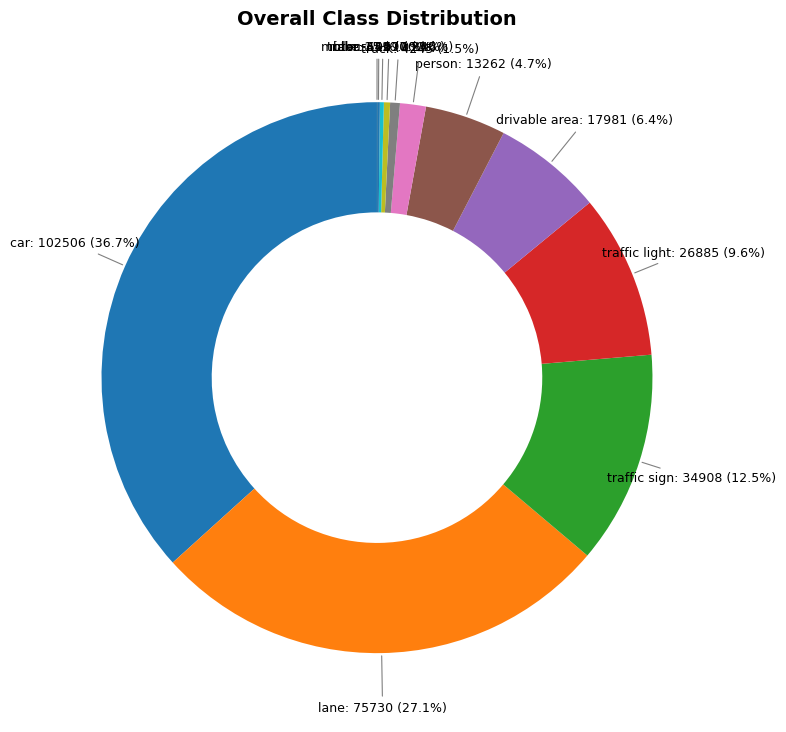

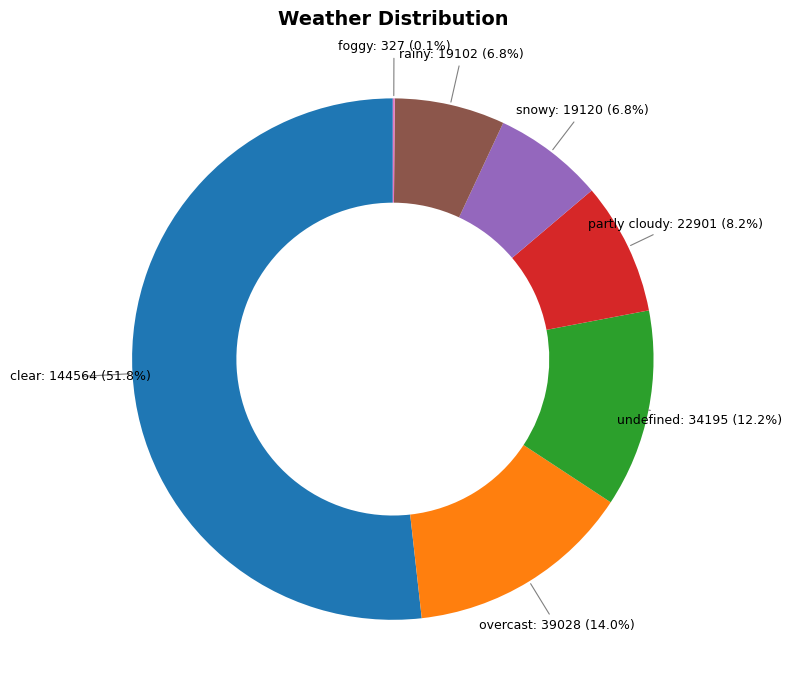

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt


def load_bdd_annotations(annotation_path):
    """Load BDD JSON annotations into a pandas DataFrame."""
    with open(annotation_path, "r", encoding="utf-8") as file:
        annotations = json.load(file)

    records = []
    for image in annotations:
        img_name = image["name"]
        weather = image["attributes"]["weather"]
        scene = image["attributes"]["scene"]
        time_of_day = image["attributes"]["timeofday"]

        for label in image["labels"]:
            records.append({
                "image": img_name,
                "weather": weather,
                "scene": scene,
                "time_of_day": time_of_day,
                "category": label["category"],
            })

    return pd.DataFrame(records)


def pie_with_arrows(series, title, save_path=None):
    """Create a clean pie chart with arrows and external labels."""
    fig, ax = plt.subplots(figsize=(8, 8))

    wedges, _ = ax.pie(
        series,
        startangle=90,
        wedgeprops=dict(width=0.4),  # donut style for clarity
        labels=None
    )

    # Draw labels outside with arrows
    for i, (wedge, label) in enumerate(zip(wedges, series.index)):
        ang = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
        x = np.cos(np.deg2rad(ang))
        y = np.sin(np.deg2rad(ang))

        # Position of text (pushed further out)
        text_x = 1.2 * x
        text_y = 1.2 * y

        ax.annotate(
            f"{label}: {series.iloc[i]} ({series.iloc[i] / series.sum() * 100:.1f}%)",
            xy=(x, y),
            xytext=(text_x, text_y),
            ha="center",
            va="center",
            arrowprops=dict(arrowstyle="-", lw=0.8, color="gray"),
            fontsize=9
        )

    ax.set_title(title, fontsize=14, weight="bold")
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()


def main():
    annotation_file = (
        "/nfs/ECAC_Data/Somya_data/BDD_Data/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_val.json"
        
    )

    df = load_bdd_annotations(annotation_file)

    # Overall class distribution
    class_counts = df["category"].value_counts()
    pie_with_arrows(
        class_counts,
        "Overall Class Distribution",
        save_path="plots/class_dist_pie_arrows.png"
    )

    # Attribute-wise example (weather)
    weather_counts = df["weather"].value_counts()
    pie_with_arrows(
        weather_counts,
        "Weather Distribution",
        save_path="plots/weather_pie_arrows.png"
    )


if __name__ == "__main__":
    import numpy as np
    main()


Total Images: 10000
Total Annotations: 279237
Unique Classes: 12


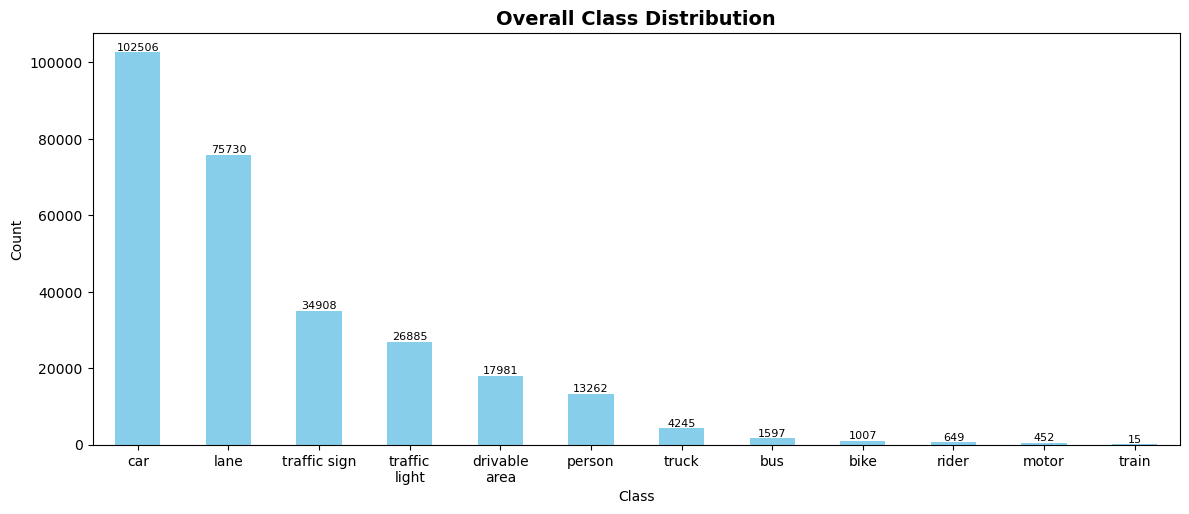

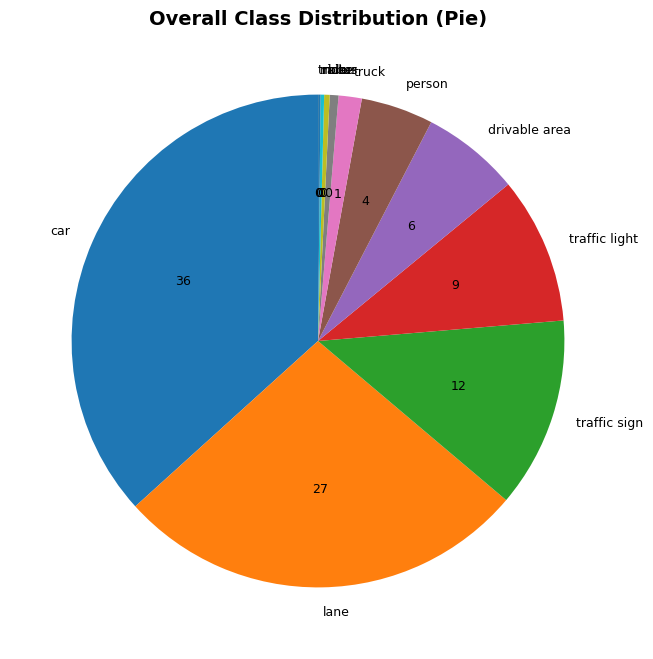

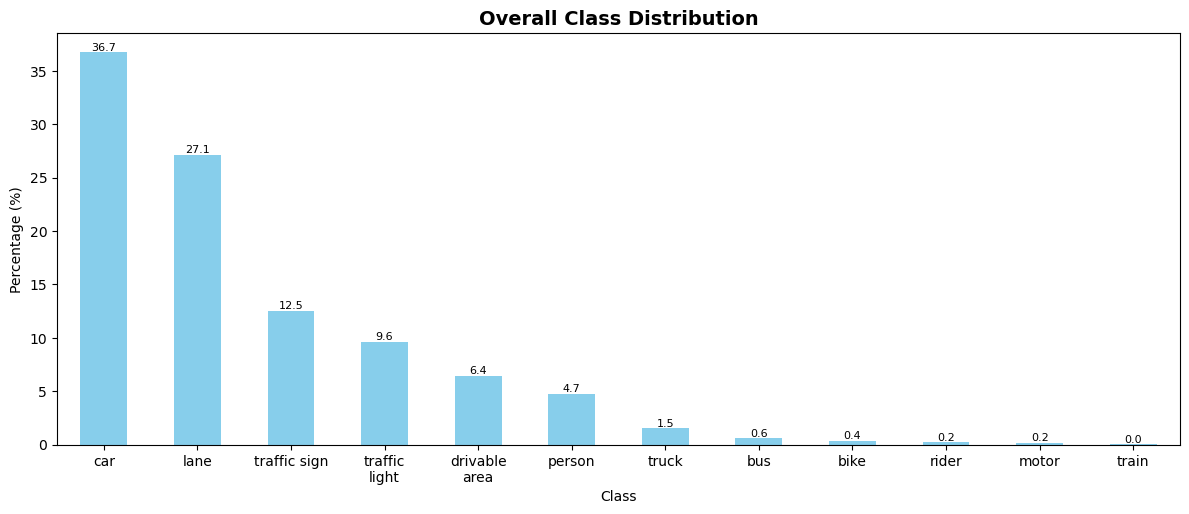

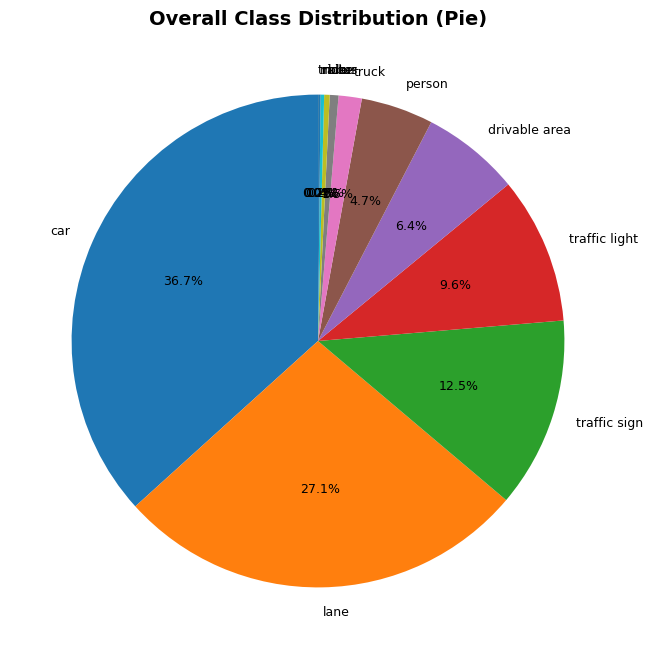

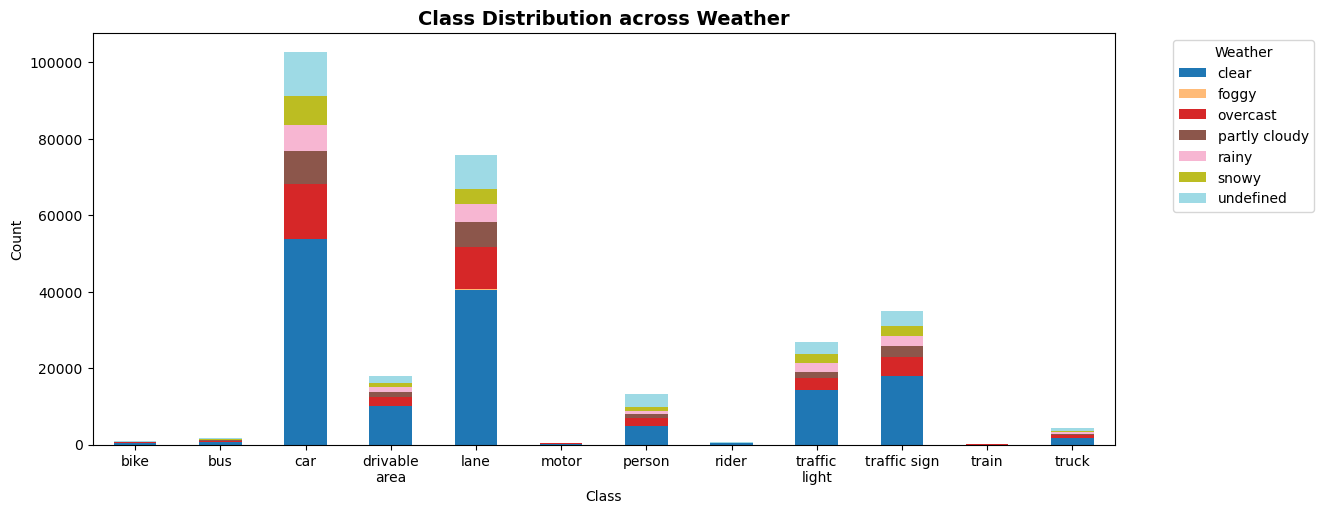

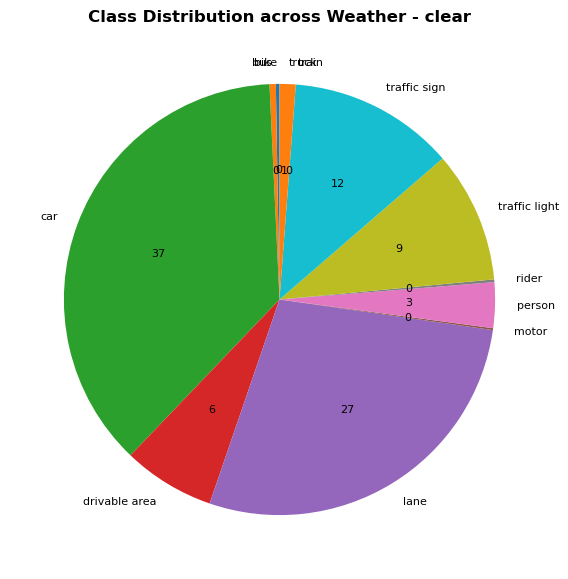

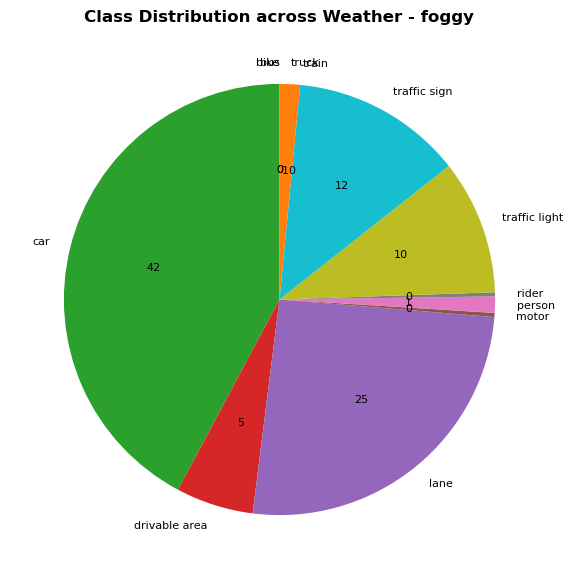

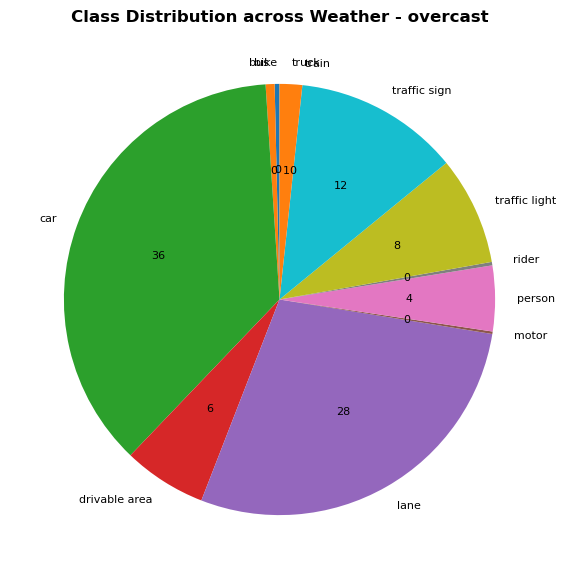

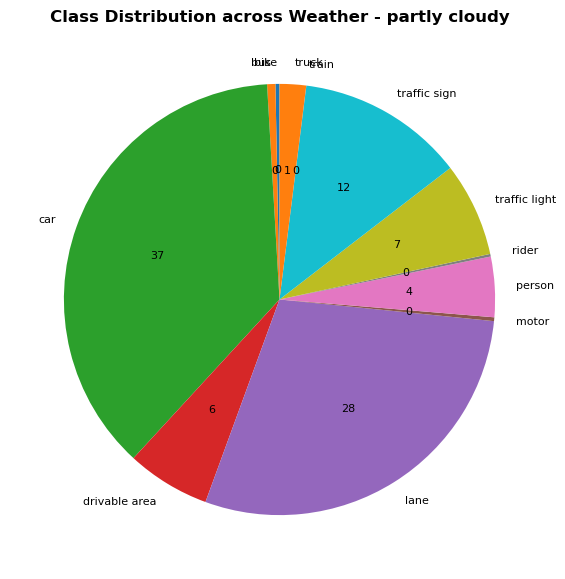

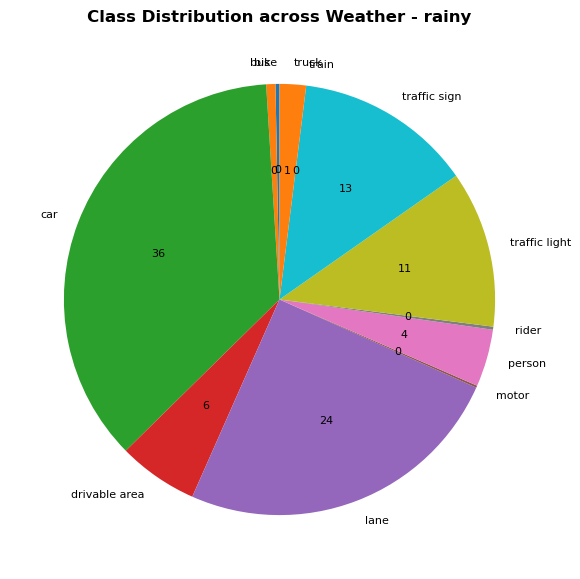

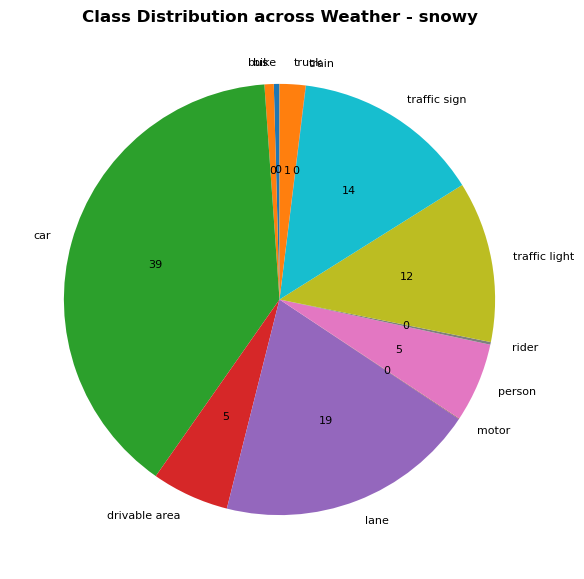

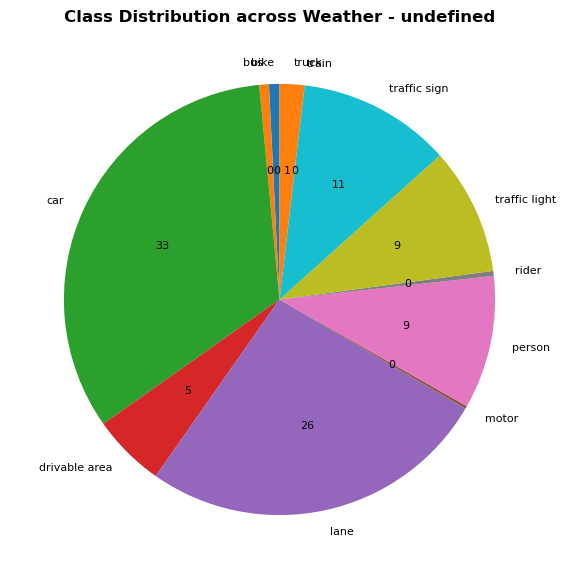

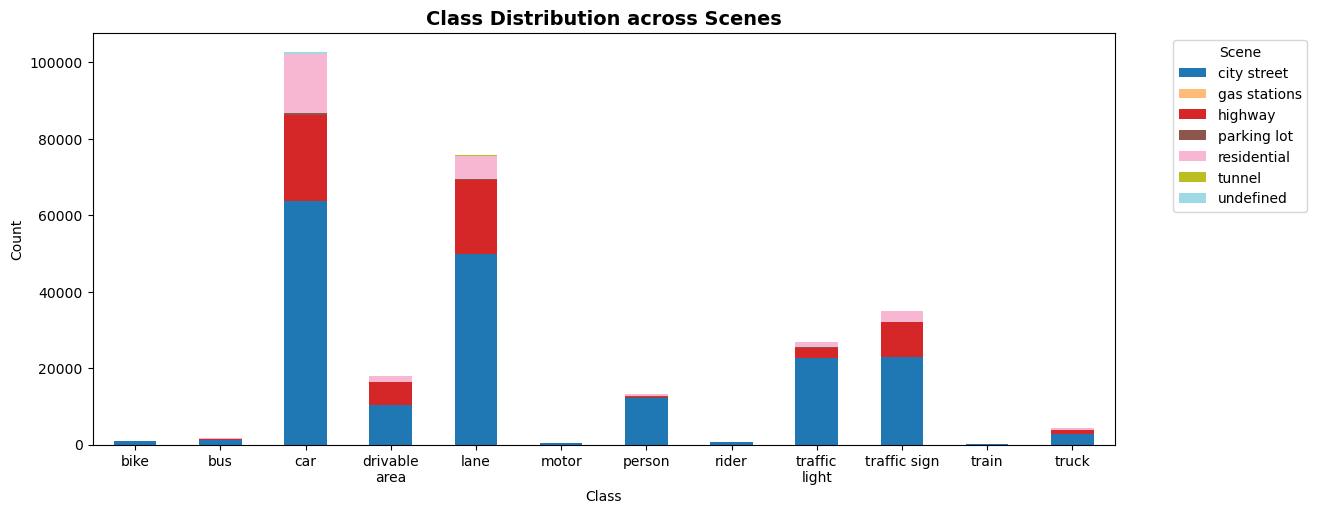

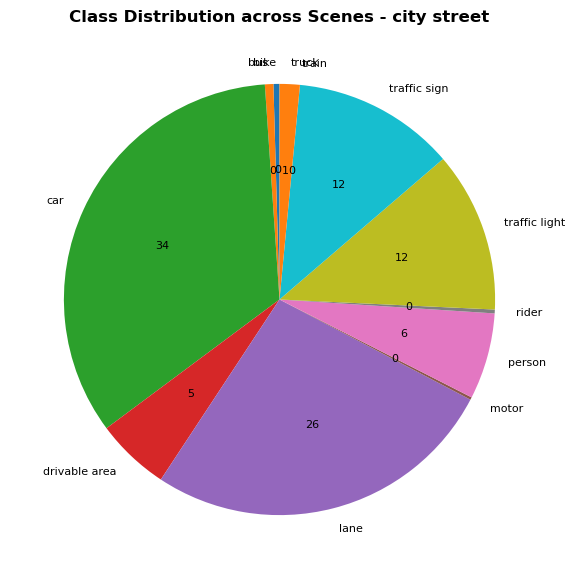

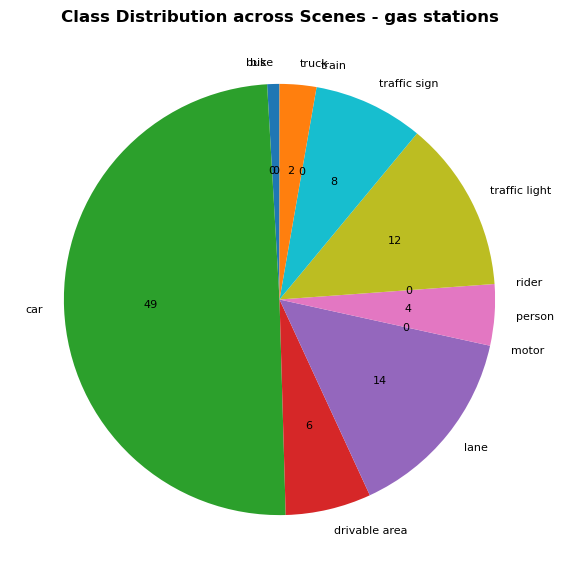

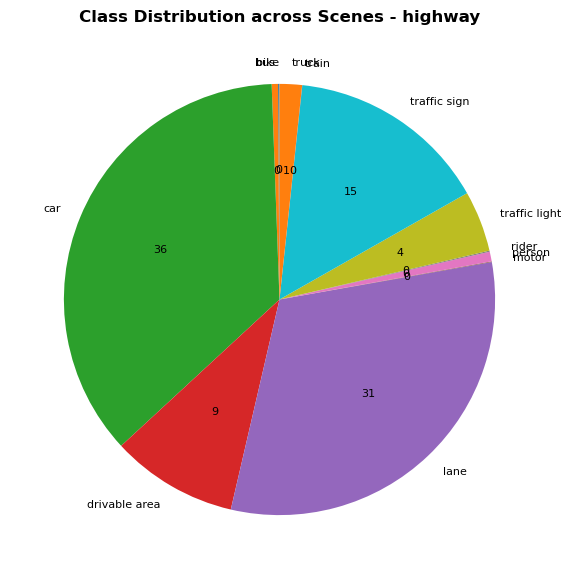

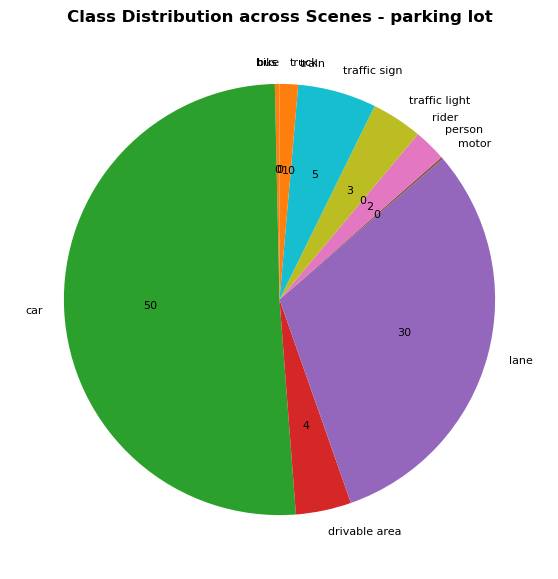

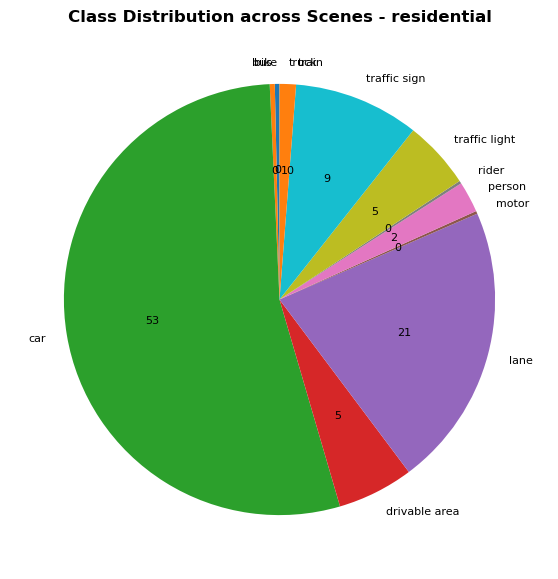

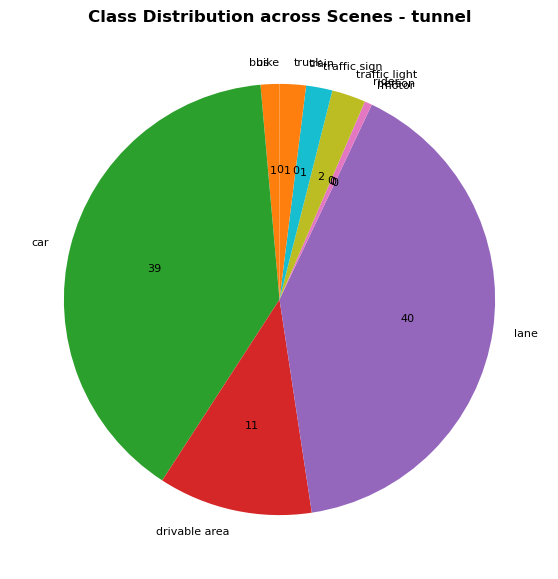

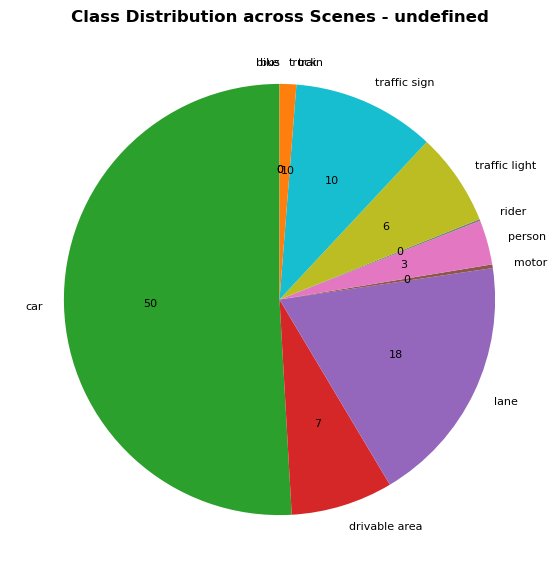

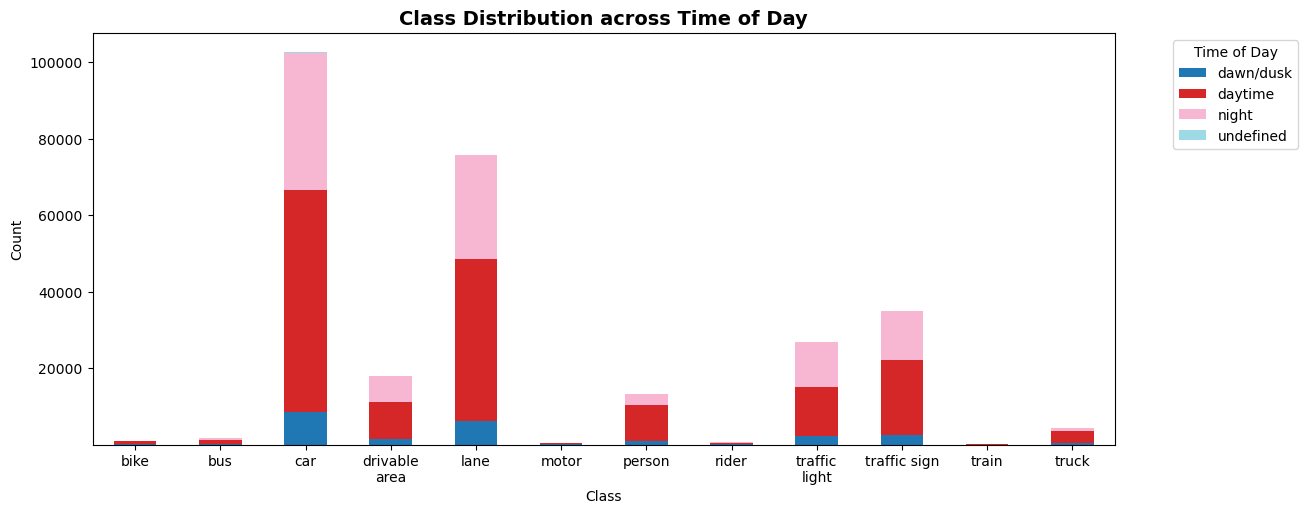

FileNotFoundError: [Errno 2] No such file or directory: 'plots/timeofday_dawn/dusk_pie.png'

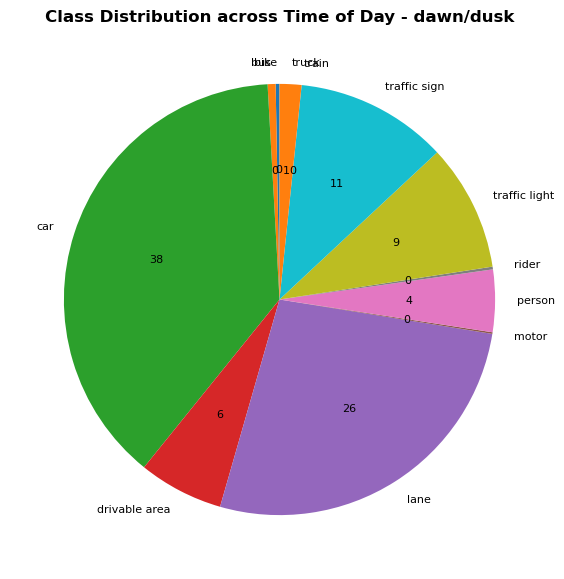

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import textwrap


def load_bdd_annotations(annotation_path):
    """Load BDD JSON annotations into a pandas DataFrame."""
    with open(annotation_path, "r", encoding="utf-8") as file:
        annotations = json.load(file)

    records = []
    for image in annotations:
        img_name = image["name"]
        weather = image["attributes"]["weather"]
        scene = image["attributes"]["scene"]
        time_of_day = image["attributes"]["timeofday"]

        for label in image["labels"]:
            records.append({
                "image": img_name,
                "weather": weather,
                "scene": scene,
                "time_of_day": time_of_day,
                "category": label["category"],
            })

    return pd.DataFrame(records)


def wrap_labels(labels, width=10):
    """Wrap long x-axis labels to avoid overlap."""
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]


def annotate_bars(ax, fmt="{:.0f}"):
    """Annotate bars in a bar chart with values."""
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(
                fmt.format(height),
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='bottom',
                fontsize=8,
                rotation=0
            )


def plot_class_distribution(df, normalize=False, save_path=None):
    """Plot overall class distribution (bar + pie)."""
    value_counts = df["category"].value_counts(normalize=normalize)

    if normalize:
        value_counts *= 100
        ylabel = "Percentage (%)"
    else:
        ylabel = "Count"

    # --- Bar chart ---
    fig, ax = plt.subplots(figsize=(12, 6))
    value_counts.plot(kind="bar", ax=ax, color="skyblue")
    ax.set_title("Overall Class Distribution", fontsize=14, weight="bold")
    ax.set_xlabel("Class")
    ax.set_ylabel(ylabel)

    # Fix overlapping labels
    ax.set_xticklabels(
        wrap_labels(value_counts.index, width=12),
        rotation=0
    )

    annotate_bars(ax, fmt="{:.1f}" if normalize else "{:.0f}")
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25)

    if save_path:
        plt.savefig(f"{save_path}_bar.png", dpi=300)
    plt.show()

    # --- Pie chart ---
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(
        value_counts,
        labels=value_counts.index,
        autopct="%1.1f%%" if normalize else "%d",
        startangle=90,
        textprops={"fontsize": 9}
    )
    ax.set_title("Overall Class Distribution (Pie)", fontsize=14,
                 weight="bold")

    if save_path:
        plt.savefig(f"{save_path}_pie.png", dpi=300)
    plt.show()


def plot_class_vs_attribute(df, attribute, title, legend_title,
                            normalize=False, save_path=None):
    """Plot class distribution vs attribute (stacked bar + pie)."""
    cross_tab = pd.crosstab(
        df["category"], df[attribute],
        normalize="index" if normalize else False
    )

    if normalize:
        cross_tab *= 100
        ylabel = "Percentage (%)"
    else:
        ylabel = "Count"

    # --- Stacked bar ---
    ax = cross_tab.plot(
        kind="bar",
        stacked=True,
        figsize=(14, 6),
        colormap="tab20"
    )
    ax.set_title(title, fontsize=14, weight="bold")
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Class")
    ax.set_xticklabels(
        wrap_labels(cross_tab.index, width=12),
        rotation=0
    )
    ax.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.25, right=0.8)

    if save_path:
        plt.savefig(f"{save_path}_stacked.png", dpi=300)
    plt.show()

    # --- Pie per attribute value ---
    for col in cross_tab.columns:
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.pie(
            cross_tab[col],
            labels=cross_tab.index,
            autopct="%1.1f%%" if normalize else "%d",
            startangle=90,
            textprops={"fontsize": 8}
        )
        ax.set_title(f"{title} - {col}", fontsize=12, weight="bold")

        if save_path:
            plt.savefig(f"{save_path}_{col}_pie.png", dpi=300)
        plt.show()


def main():
    annotation_file = (
        "/nfs/ECAC_Data/Somya_data/BDD_Data/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_val.json"
        
    )

    df = load_bdd_annotations(annotation_file)

    print("Total Images:", df["image"].nunique())
    print("Total Annotations:", len(df))
    print("Unique Classes:", df["category"].nunique())

    # Save plots in "plots" folder
    out_dir = "plots"

    plot_class_distribution(
        df, normalize=False, save_path=f"{out_dir}/class_dist"
    )
    plot_class_distribution(
        df, normalize=True, save_path=f"{out_dir}/class_dist_norm"
    )

    plot_class_vs_attribute(
        df, "weather", "Class Distribution across Weather",
        "Weather", normalize=False, save_path=f"{out_dir}/weather"
    )
    plot_class_vs_attribute(
        df, "scene", "Class Distribution across Scenes",
        "Scene", normalize=False, save_path=f"{out_dir}/scene"
    )
    plot_class_vs_attribute(
        df, "time_of_day", "Class Distribution across Time of Day",
        "Time of Day", normalize=False, save_path=f"{out_dir}/timeofday"
    )

    # Normalized plots
    plot_class_vs_attribute(
        df, "weather", "Class Distribution across Weather (Normalized)",
        "Weather", normalize=True, save_path=f"{out_dir}/weather_norm"
    )
    plot_class_vs_attribute(
        df, "scene", "Class Distribution across Scenes (Normalized)",
        "Scene", normalize=True, save_path=f"{out_dir}/scene_norm"
    )
    plot_class_vs_attribute(
        df, "time_of_day",
        "Class Distribution across Time of Day (Normalized)",
        "Time of Day", normalize=True, save_path=f"{out_dir}/timeofday_norm"
    )


if __name__ == "__main__":
    main()
